# 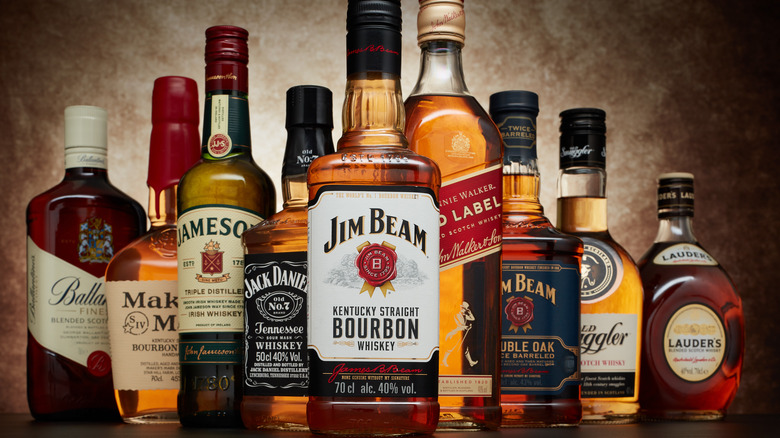

## Objective ##

In a world brimming with choices, selecting the perfect whiskey can be a delightful yet daunting task. Imagine a tool that combines the artistry of distillation with the power of data science to help you discover the whiskey that suits your palate best. 

In this analysis we explore the data set that has over 8000 unique Whiskey and thier categories as well as price and review. We will analyze its pattern and build **Characteristic Based Recommendation System** using customer's review

## Steps ##

#### Data Cleaning & Transformation #### 
clean the dataset by taking out duplicate values, null values, as well as outliners. Prepare the data so it can be processed through statistic models effectively

#### Featurn Engineering ####
Develop new features based on the transactional data to create a customer-centric dataset, settling the foundation for customer segmentation.

#### Exploratory analysis ####
Conduct the prelimenary analysis to uncover the simple and obvious trend shown in the data

#### Recommendation System ####
Build the recommendation system based on Characteristic and based 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#import the dataset
df = pd.read_csv('/kaggle/input/22000-scotch-whisky-reviews/scotch_review.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2247 entries, 0 to 2246
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    2247 non-null   int64 
 1   name          2247 non-null   object
 2   category      2247 non-null   object
 3   review.point  2247 non-null   int64 
 4   price         2247 non-null   object
 5   currency      2247 non-null   object
 6   description   2247 non-null   object
dtypes: int64(2), object(5)
memory usage: 123.0+ KB


In [3]:
df = df.rename(columns = {'Unnamed: 0':'number'})
df.head()

,number,name,category,review.point,price,currency,description
0,1,"Johnnie Walker Blue Label, 40%",Blended Scotch Whisky,97,225,$,"Magnificently powerful and intense. Caramels, ..."
1,2,"Black Bowmore, 1964 vintage, 42 year old, 40.5%",Single Malt Scotch,97,4500.00,$,What impresses me most is how this whisky evol...
2,3,"Bowmore 46 year old (distilled 1964), 42.9%",Single Malt Scotch,97,13500.00,$,There have been some legendary Bowmores from t...
3,4,"Compass Box The General, 53.4%",Blended Malt Scotch Whisky,96,325,$,With a name inspired by a 1926 Buster Keaton m...
4,5,"Chivas Regal Ultis, 40%",Blended Malt Scotch Whisky,96,160,$,"Captivating, enticing, and wonderfully charmin..."


Here we can see, the database is filled with 2247 unique value with 6 different columns:Number,Name, Category, Review.point, price, Currency, Description



In [4]:
# which category has the most about of Whisky
whisky_number_ranks = df.groupby('category').count().reset_index()
whisky_number_ranks.sort_values('number', ascending = False, inplace = True)
whisky_number_ranks.head()

,category,number,name,review.point,price,currency,description
4,Single Malt Scotch,1819,1819,1819,1819,1819,1819
1,Blended Scotch Whisky,211,211,211,211,211,211
0,Blended Malt Scotch Whisky,132,132,132,132,132,132
3,Single Grain Whisky,57,57,57,57,57,57
2,Grain Scotch Whisky,28,28,28,28,28,28


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Single Malt Scotch'),
  Text(1, 0, 'Blended Scotch Whisky'),
  Text(2, 0, 'Blended Malt Scotch Whisky'),
  Text(3, 0, 'Single Grain Whisky'),
  Text(4, 0, 'Grain Scotch Whisky')])

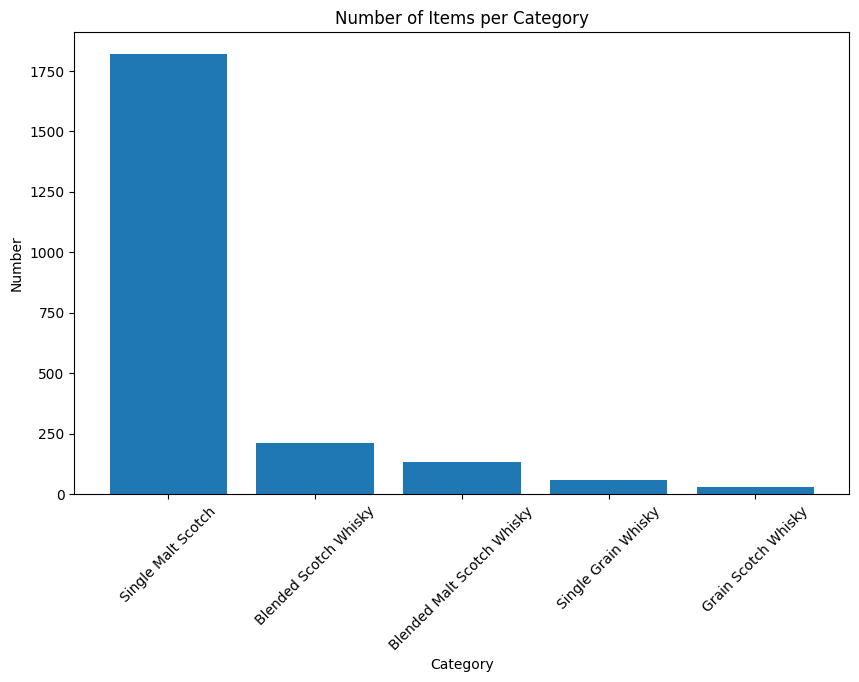

In [5]:
#plot number of items per category
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(whisky_number_ranks['category'], whisky_number_ranks['number'])
plt.xlabel('Category')
plt.ylabel('Number')
plt.title('Number of Items per Category')
plt.xticks(rotation=45) 

In [6]:
# which category has the best whiskey
whisky_quality_ranks = df.groupby('category').mean('review.point').reset_index()
whisky_quality_ranks.sort_values('review.point', ascending = False, inplace = True)
whisky_quality_ranks.head()

,category,number,review.point
0,Blended Malt Scotch Whisky,987.696970,87.659091
1,Blended Scotch Whisky,1054.867299,87.236967
4,Single Malt Scotch,1134.309511,86.608576
2,Grain Scotch Whisky,1145.857143,86.500000
3,Single Grain Whisky,1355.824561,85.508772


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Blended Malt Scotch Whisky'),
  Text(1, 0, 'Blended Scotch Whisky'),
  Text(2, 0, 'Single Malt Scotch'),
  Text(3, 0, 'Grain Scotch Whisky'),
  Text(4, 0, 'Single Grain Whisky')])

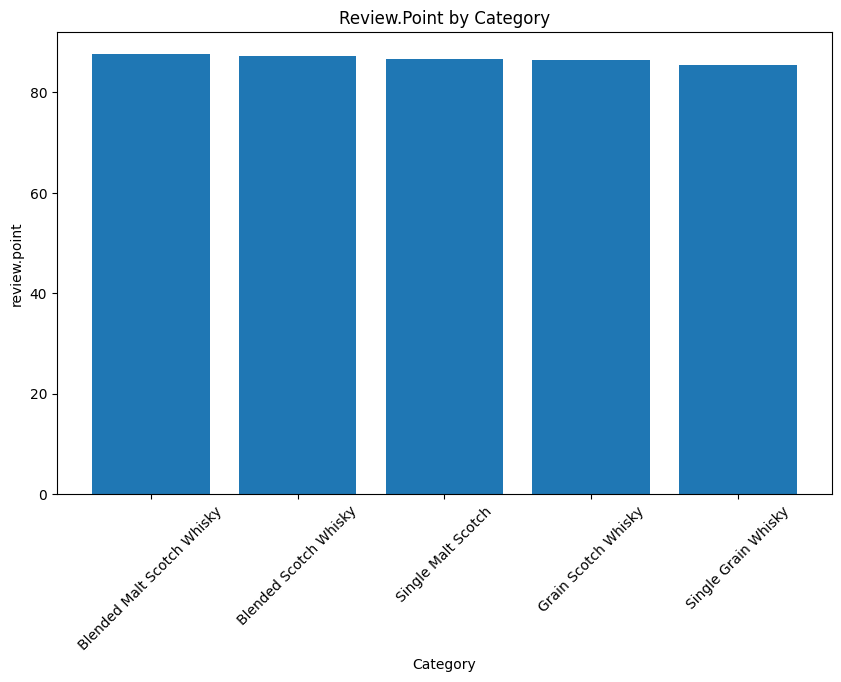

In [7]:
#plot category with the best whiskey
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(whisky_quality_ranks['category'], whisky_quality_ranks['review.point'])
plt.xlabel('Category')
plt.ylabel('review.point')
plt.title('Review.Point by Category')
plt.xticks(rotation=45) 

In [8]:
#extract the percentage achohol from the name
df['percentage'] = df['name'].str[-3:]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2247 entries, 0 to 2246
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   number        2247 non-null   int64 
 1   name          2247 non-null   object
 2   category      2247 non-null   object
 3   review.point  2247 non-null   int64 
 4   price         2247 non-null   object
 5   currency      2247 non-null   object
 6   description   2247 non-null   object
 7   percentage    2247 non-null   object
dtypes: int64(2), object(6)
memory usage: 140.6+ KB


In [9]:
# Remove commas from the 'price' column
df['percentage'] = df['percentage'].str.replace('%', '')
df = df[df['percentage'].str.isnumeric()]

# Convert the 'percentage' column to float
df['percentage'] = df['percentage'].astype('float64')

In [10]:
#find the category of whisky with the highes achohol percentage
whisky_percentage_ranks = df.groupby('category').mean('percentage').reset_index()
whisky_percentage_ranks.sort_values('percentage', ascending = False, inplace = True)
whisky_percentage_ranks.head()

,category,number,review.point,percentage
4,Single Malt Scotch,1231.948347,85.990702,47.782025
3,Single Grain Whisky,1295.000000,85.733333,46.266667
2,Grain Scotch Whisky,904.428571,88.428571,44.428571
0,Blended Malt Scotch Whisky,1115.697368,86.921053,44.197368
1,Blended Scotch Whisky,1146.545977,86.678161,42.000000


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Single Malt Scotch'),
  Text(1, 0, 'Single Grain Whisky'),
  Text(2, 0, 'Grain Scotch Whisky'),
  Text(3, 0, 'Blended Malt Scotch Whisky'),
  Text(4, 0, 'Blended Scotch Whisky')])

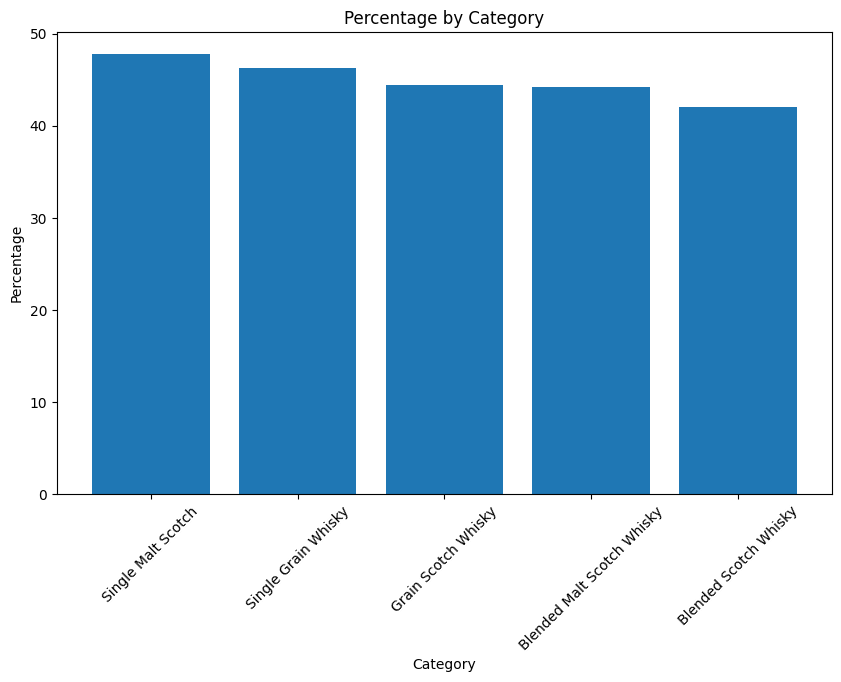

In [11]:
#plot category with the strongest whiskey
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(whisky_percentage_ranks['category'], whisky_percentage_ranks['percentage'])
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.title('Percentage by Category')
plt.xticks(rotation=45) 

## Word Cloud ##

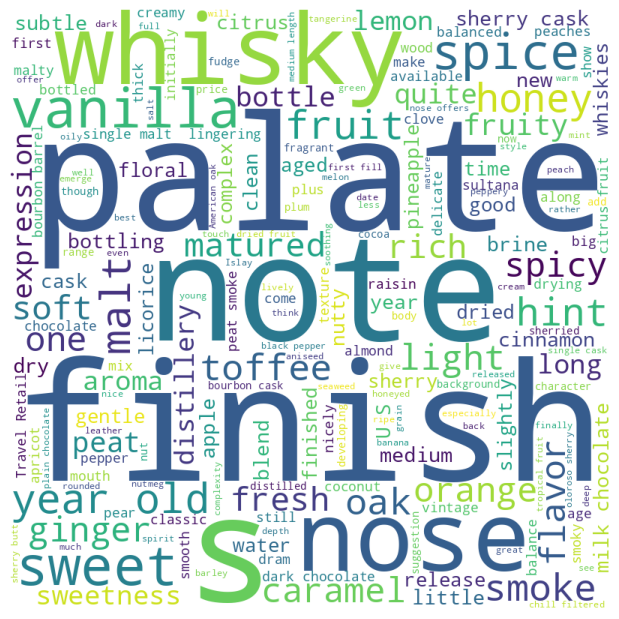

In [12]:
from wordcloud import WordCloud as wc

#analyze the description by creating word clouds or frequency tables of the most common words used in the reviews
description_text = ''.join(df['description'].dropna().values)
wordcloud = wc(width=800, height=800, background_color = 'white', min_font_size = 10).generate(description_text)
plt.figure(figsize=(6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Here we have built a word cloud that evaluate the frequency of appearence of difference words that is used to describe the Whiskey. As we can see, palate and finish are some of the most repeated words.

when it comes to flavour, vanilla, sweet, caramel are also frequently mentioned

# Recommendation system 1 #

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as "the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
df['description'] = df['description'].fillna('')

#Construct the required TF-idf matrix by fitting and transforming the data 
tfidf_matrix = tfidf.fit_transform(df['description'])

#Output the shape of tfid_matrix
tfidf_matrix.shape

(1240, 6381)

In [14]:
#Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

#Compute the cosine similarity matrix 
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [15]:
#Construct a reverse map of indicaes and movie titles
indices = pd.Series(df.index, index=df  ['name']).drop_duplicates()

In [16]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df['name'].iloc[movie_indices]

In [17]:
get_recommendations('Johnnie Walker Blue Label, 40%')

42      Chivas Regal 18 year old Ultimate Cask Collect...
1125          Wemyss “A Matter of Smoke” 15 year old, 46%
1410           J. Mossman Platinum Crown 15 year old, 40%
1600                       Duncan Taylor 18 year old, 40%
261     Ballantine’s 21 year old Signature Oak Edition...
1740    Master of Malt Secret Bottlings Series 8 year ...
1880                         Wemyss Malts Spice King, 46%
90                               Ardbeg, 10 year old, 46%
243                           Springbank 15 year old, 46%
1011         Benromach Organic 2017 (distilled 2010), 43%
Name: name, dtype: object

Here we can see, given our receommendation system,

if we ask to find a recommendation for the Whiskey "Johnnie Walker Blue Label, 40%"

it gives us 10 results such as "Wemyss “A Matter of Smoke” 15 year old, 46%" and "Ardbeg, 10 year old, 46%"